 Part A: Airbnb Price Prediction and Insights

Deliverables

 1. Data Exploration and Preprocessing

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

# Load the dataset
df = pd.read_csv("Airbnb_data.csv") 

# Display the first 5 rows
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [243]:
# Check dataset info
df.info()

# Check summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [245]:
# Check number of missing values in each column
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [247]:
# Fill missing values for numerical columns with median
num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
# Verify changes
df[num_cols].isnull().sum()

bathrooms               0
bedrooms                0
beds                    0
review_scores_rating    0
dtype: int64

In [249]:
# Convert non-null values to string first, then remove '%' and convert to float
df['host_response_rate'] = df['host_response_rate'].astype(str).str.rstrip('%')

# Convert column to numeric, setting errors='coerce' to handle any unexpected values
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

# Fill missing values with median
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)

# Verify changes
df['host_response_rate'].isnull().sum()

0

In [251]:
# Convert dates to datetime format
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

# Fill missing dates with the most common date
df['host_since'].fillna(df['host_since'].mode()[0], inplace=True)
df['first_review'].fillna(df['first_review'].mode()[0], inplace=True)
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)

# Create a new feature: How long the host has been on Airbnb
df['host_years'] = 2025 - df['host_since'].dt.year

# Verify changes
df[['host_since', 'first_review', 'last_review', 'host_years']].isnull().sum()

host_since      0
first_review    0
last_review     0
host_years      0
dtype: int64

In [253]:
# List of boolean columns
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

# Convert 't' to True and 'f' to False
for col in bool_cols:
    df[col] = df[col].map({'t': True, 'f': False})

# Fill missing values with False and convert to integer (0 or 1)
df[bool_cols] = df[bool_cols].fillna(False).astype(int)

# Verify changes
df[bool_cols].isnull().sum()

host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
dtype: int64

In [255]:
df['neighbourhood'].fillna("Unknown", inplace=True) # Fill with "Unknown"
df['zipcode'].fillna(df['zipcode'].mode()[0], inplace=True) #Fill with mode

# Verify changes
df[['neighbourhood', 'zipcode']].isnull().sum()

neighbourhood    0
zipcode          0
dtype: int64

In [257]:
# Dropping some columns which are not much useful
df.drop(columns=['thumbnail_url', 'description'], inplace=True)

# Verify remaining missing values
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
host_years                0
dtype: int64

In [259]:
# Define function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to numerical columns with potential outliers
df = remove_outliers(df, "log_price")
df = remove_outliers(df, "accommodates")
df = remove_outliers(df, "bathrooms")
df = remove_outliers(df, "bedrooms")
df = remove_outliers(df, "beds")

# Verify shape after removing outliers
df.shape

(34576, 28)

In [261]:
#Feature Engineering such as neighborhood popularity, number of amenities, and host activity metrics
# Compute the number of listings per neighborhood
neighborhood_counts = df['neighbourhood'].value_counts()

# Compute the average review score per neighborhood
neighborhood_avg_review = df.groupby('neighbourhood')['review_scores_rating'].mean()

# Normalize and combine these factors into a popularity score
df['neighborhood_popularity'] = df['neighbourhood'].map(lambda x: (neighborhood_counts[x] - neighborhood_counts.min()) 
                                                        / (neighborhood_counts.max() - neighborhood_counts.min()))
df['neighborhood_avg_review'] = df['neighbourhood'].map(lambda x: (neighborhood_avg_review[x] - neighborhood_avg_review.min()) 
                                                        / (neighborhood_avg_review.max() - neighborhood_avg_review.min()))

# Weighted score: 70% listings count + 30% average review score
df['neighborhood_popularity'] = (df['neighborhood_popularity'] * 0.7) + (df['neighborhood_avg_review'] * 0.3)

# Fill NaNs with the mean value
df['neighborhood_popularity'].fillna(df['neighborhood_popularity'].mean(), inplace=True)

# Verify the new feature
df[['neighbourhood', 'neighborhood_popularity']].head()

,neighbourhood,neighborhood_popularity
0,Brooklyn Heights,0.247012
5,Noe Valley,0.256796
6,Unknown,0.906962
7,Downtown,0.248859
8,Richmond District,0.243277


In [262]:
# Create a new column for number of amenities
df['num_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Verify the new feature
df[['amenities', 'num_amenities']].head()

,amenities,num_amenities
0,"{""Wireless Internet"",""Air conditioning"",Kitche...",9
5,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",10
6,"{TV,Internet,""Wireless Internet"",""Air conditio...",21
7,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",26
8,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",21


In [265]:
# Convert 'host_response_rate' from percentage string to numeric
df['host_response_rate'] = df['host_response_rate'].astype(str).str.rstrip('%').astype(float) / 100

# Create a feature for the number of days the host has been on Airbnb
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_days_active'] = (pd.to_datetime('today') - df['host_since']).dt.days

# Verify the new features
df[['host_response_rate', 'host_days_active']].head()

,host_response_rate,host_days_active
0,1.0,4718
5,1.0,2819
6,1.0,2915
7,1.0,4300
8,1.0,3553


 2. Model Development 

In [268]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert 'amenities' to numeric (count of amenities)
df['num_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
df = df.drop(columns=['amenities'])

# Convert categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['city', 'neighbourhood', 'zipcode'], drop_first=True)

# Convert boolean-like columns ('t' and 'f') to numeric (1 and 0)
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
df[bool_cols] = df[bool_cols].replace({'t': 1, 'f':0})

# Define target variable (log-transformed price)
y = df['log_price']
X = df.drop(columns=['log_price', 'id', 'name'])  # Drop non-relevant columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [90]:
# Ensure X_train and X_test have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [38]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

3. Model Evaluation

In [42]:
def evaluate_model(y_test, y_pred, model_name):
    print(f" {model_name} Performance:")
    print(f" RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f" MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f" R² Score: {r2_score(y_test, y_pred):.2f}")
    print("-" * 40)

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

 Linear Regression Performance:
 RMSE: 0.54
 MAE: 0.43
 R² Score: 0.02
----------------------------------------
 Random Forest Regressor Performance:
 RMSE: 0.37
 MAE: 0.28
 R² Score: 0.54
----------------------------------------


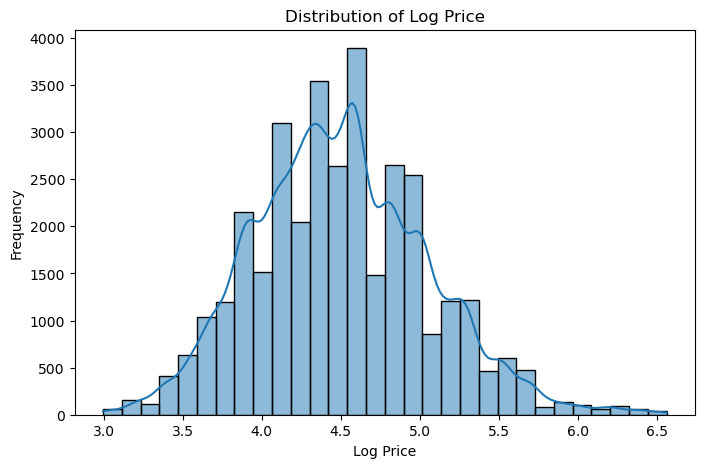

In [66]:
# Visualizations
plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], bins=30, kde=True)
plt.title("Distribution of Log Price")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()

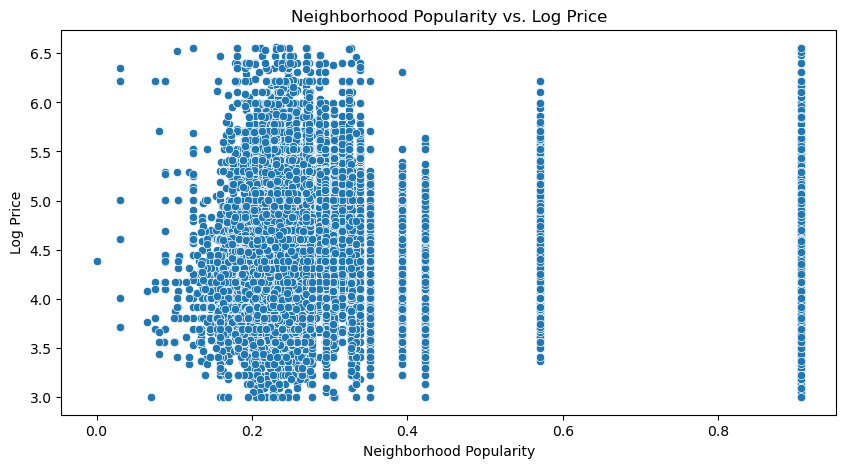

In [68]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['neighborhood_popularity'], y=df['log_price'])
plt.title("Neighborhood Popularity vs. Log Price")
plt.xlabel("Neighborhood Popularity")
plt.ylabel("Log Price")
plt.show()

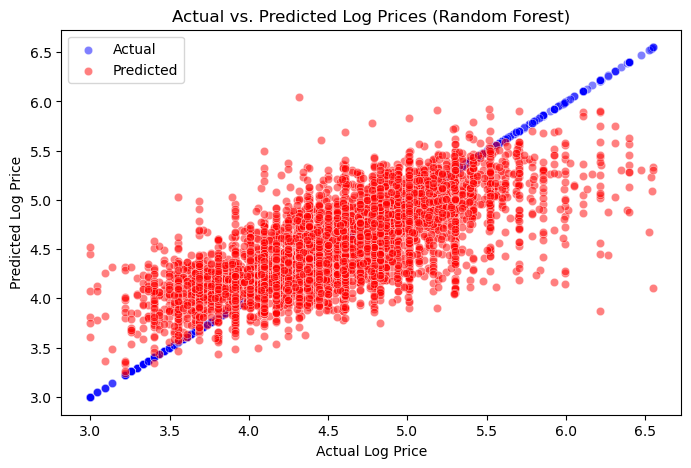

In [272]:
plt.figure(figsize=(8, 5))

# Plot actual values in one color and predicted values in another
sns.scatterplot(x=y_test, y=y_test, color="blue", alpha=0.5, label="Actual")  # Blue for actual values
sns.scatterplot(x=y_test, y=y_pred_rf, color="red", alpha=0.5, label="Predicted")  # Red for predicted values

plt.title("Actual vs. Predicted Log Prices (Random Forest)")
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.legend()  # Show the legend
plt.show()

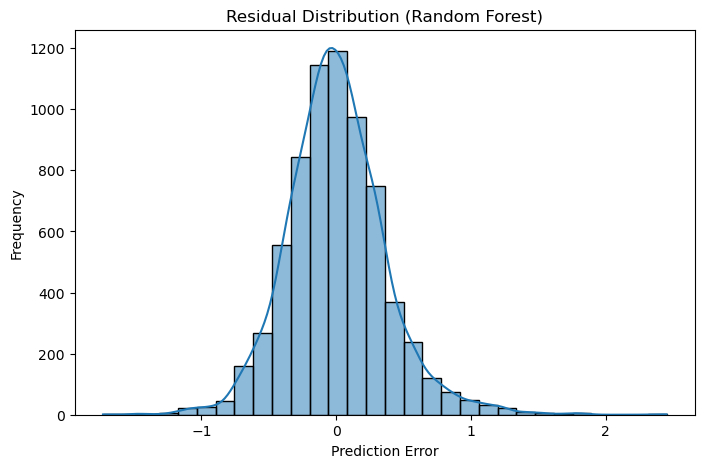

In [74]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution (Random Forest)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [86]:
# Tuning the Model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 30],  
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1), 
                           param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

evaluate_model(y_test, y_pred_best_rf, "Grid Search Tuned RF")

 Grid Search Tuned RF Performance:
 RMSE: 0.37
 MAE: 0.28
 R² Score: 0.54
----------------------------------------


In [98]:
from xgboost import XGBRegressor

# Define XGBoost model with default parameters
xgb = XGBRegressor(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

 XGBoost Regressor Performance:
 RMSE: 0.36
 MAE: 0.27
 R² Score: 0.56
----------------------------------------


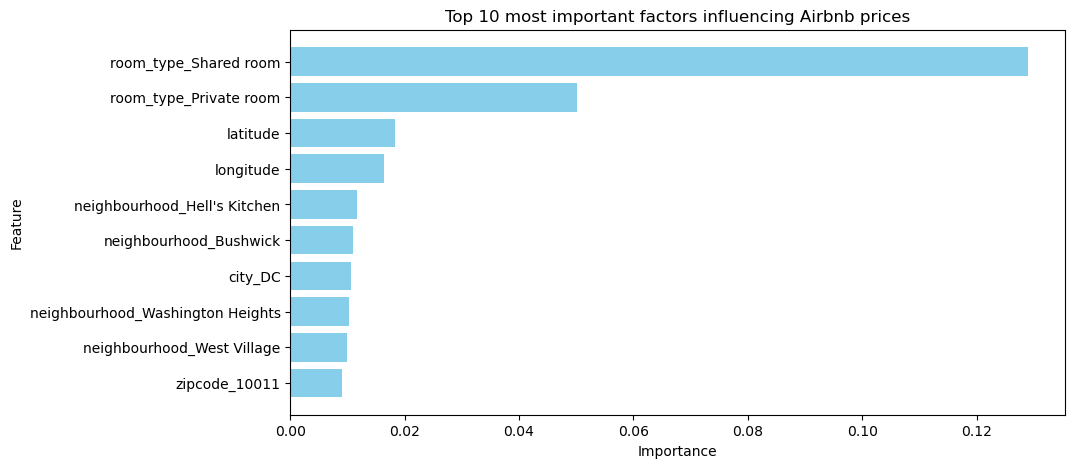

In [276]:
# Insights about the factors influencing Airbnb prices

# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb.feature_importances_})

# Sort by importance and show top 10
top_10_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 most important factors influencing Airbnb prices')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

 4. Final Report and Presentation 

https://drive.google.com/file/d/1RbhneCoKSUMtrIzZ9_omfKhD0b1m_KwH/view?usp=sharing